In [78]:
# Import libraries
!pip install textblob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
# For sentiment analysis
from textblob import TextBlob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/624.3 kB 653.6 kB/s eta 0:00:01
   ----- ---------------------------------- 92.2/624.3 kB 1.3 MB/s eta 0:00:01
   ------ ------------------------------- 112.6/624.3 kB 939.4 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/624.3 kB 853.3 kB/s eta 0:00:01
   --------- ---------------------------- 153.6/624.3 kB 657.6 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/624.3 kB 655.4 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/624.3 kB 655.1 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/624.3 kB 655.1 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/624.3 kB 655.1 kB/s eta 0:00:01
   ---------------- --------------------- 276.5/624.3 kB 587.7 kB/s eta 0:00:01
   ---------------- --------------------- 276.5/624.3 kB 587.7 kB/s eta 0:00:01
   ---------------- --------------------- 276.5/62


[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
df=pd.read_csv("blogs.csv")

In [80]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [82]:
print(df.head())


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [83]:
print(df['Labels'].value_counts())


alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64


In [84]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [86]:
print(df.isnull().sum())

Data      0
Labels    0
dtype: int64


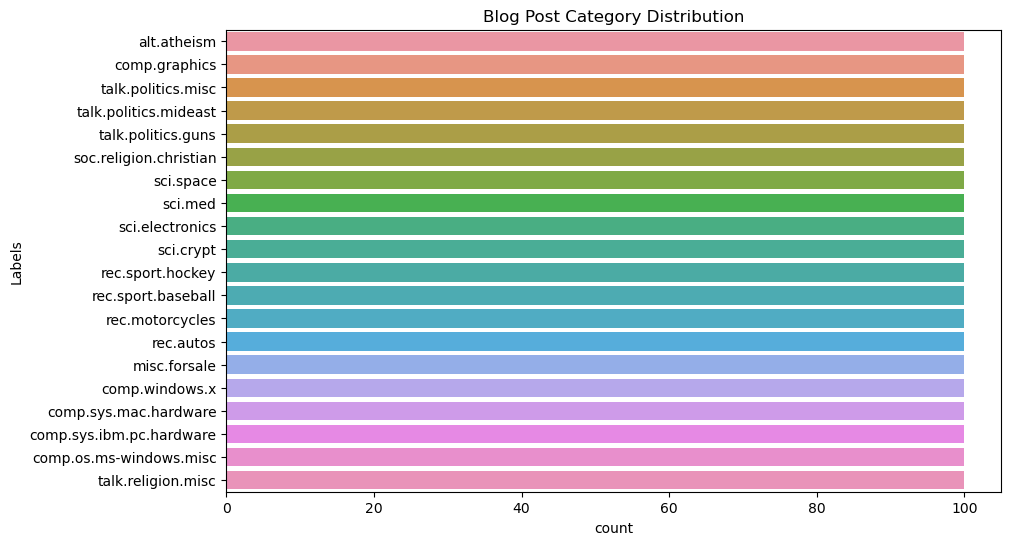

In [87]:
# Visualize category distribution
plt.figure(figsize=(10,6))
sns.countplot(y='Labels', data=df, order=df['Labels'].value_counts().index)
plt.title('Blog Post Category Distribution')
plt.show()

In [88]:
#Text Preprocessing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Clean_Data'] = df['Data'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [90]:
#Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Clean_Data'])
y = df['Labels']


In [97]:
#Naive Bayes Model for Text Classification
#Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [99]:
#Model Training & Prediction
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)


In [100]:
#Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)
print(df[['Labels', 'Sentiment']].head())


        Labels Sentiment
0  alt.atheism   Neutral
1  alt.atheism   Neutral
2  alt.atheism   Neutral
3  alt.atheism   Neutral
4  alt.atheism  Positive


In [101]:
# Sentiment distribution by category
sentiment_dist = pd.crosstab(df['Labels'], df['Sentiment'])
print(sentiment_dist)

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7       33        60
rec.autos                        7       48        45
rec.motorcycles                  7       49        44
rec.sport.baseball               8       53        39
rec.sport.hockey                13       56        31
sci.crypt                        3       62        35
sci.electronics                  4       56        40
sci.med                         11       56        33
sci.space                        5       53        42
soc.religion.christian           1       61        38
talk.politics.guns          

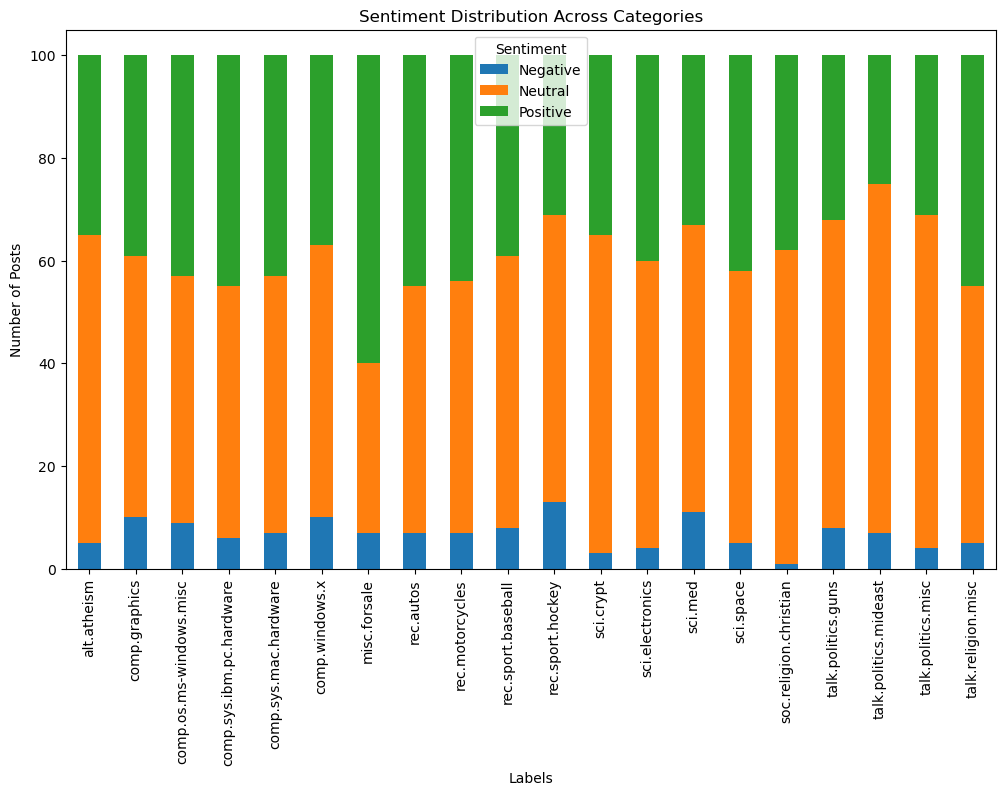

In [102]:
# Visualize
sentiment_dist.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Sentiment Distribution Across Categories')
plt.ylabel('Number of Posts')
plt.show()


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.74      0.70      0.72        20
           comp.graphics       0.81      0.85      0.83        20
 comp.os.ms-windows.misc       0.84      0.80      0.82        20
comp.sys.ibm.pc.hardware       0.52      0.70      0.60        20
   comp.sys.mac.hardware       0.87      0.65      0.74        20
          comp.windows.x       0.76      0.80      0.78        20
            misc.forsale       0.86      0.90      0.88        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.90      0.90      0.90        20
      rec.sport.baseball       0.91      1.00      0.95        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.86      0.95      0.90        20
         sci.electronics       0.78      0.70      0.74        20
                 sci.med       0.93      0.65      

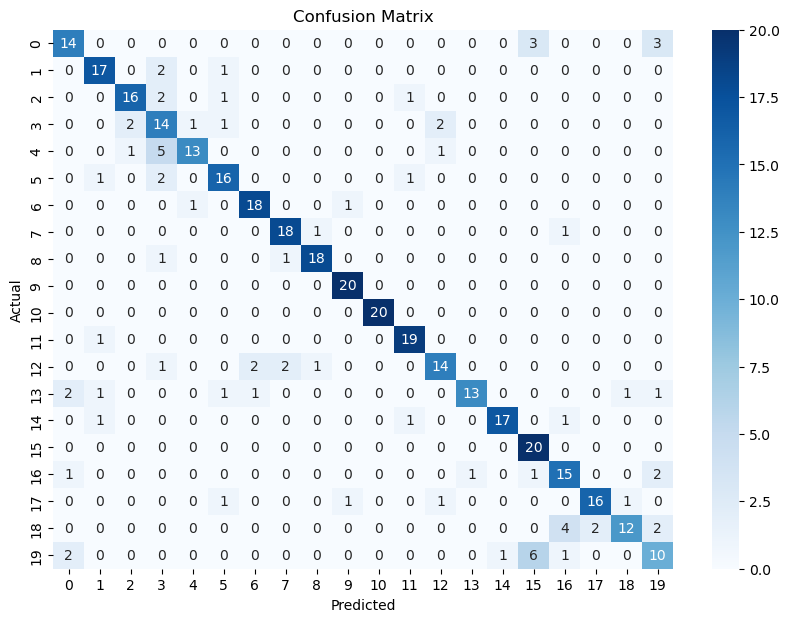

In [103]:
#Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
